**Attention in Transformers**

1) The purpose of this notebook is to illustrate the mathematical operations that are part of the Attention mechanism, which is the core component of Transformers.

2) As mentioned in my [articles](https://) every word (embedding) inputted into the Transformer is associated with three vectors: the Query (Q) vector, Key (K) vector, and Value (V) vector.

3) The length of the Q, K, and V vectors is the same as the length of the input embedding vectors. In the paper "Attention Is All You Need," the embedding length was 512.

4) In this code, we will randomly initialize the Q, K, and V vectors.

5) In the code below, the length (L) of the input sequence is 4, assuming that you are translating the sentence "I Love Deep Learning."

6) For illustrative purposes, we will set the size of Q, K, and V as 8 instead of 512.

7) We will randomly initialize Q, K, and V using NumPy's randn function [https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html].

8) In reality, the Q, K, and V vectors are obtained by passing the positional embedding through three separate linear layers, each having its own set of weights.

9) The positional embedding establishes the order of words in a sentence. I have discussed the mathematics behind it in my blog post on the "Evolution of Language Models."

In [ ]:
import numpy as np
import math

In [ ]:
# L, d_q, d_k, d_v
# Length = Length of the sentence
# d_q, d_k, d_v = size of the query, key and value  respectively.

L, d_q, d_k, d_v = 4, 8, 8, 8
q = np.random.randn(L, d_q)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

#Since every word of the sentence will be associated with a query, key and
#value vector we take the dimension of each of these as 8
# 4 is the length(L) of the sentence ('I Love Deep Learning')

#Printing the Q, K, V vectors

print("Q = \n", q)
print("K = \n", k)
print("V = \n", v)


Q = 
 [[ 0.39211505 -0.05089482 -0.11461102 -0.49038804  0.12826983 -0.74798088
  -1.37127712  0.72757952]
 [ 1.0091794  -0.79030116  0.10490977 -0.76836868 -0.55016784  0.48483291
   0.10617249 -0.51838965]
 [-0.48753939  0.27091381  0.31246007 -2.29066701  1.4166964  -0.85795957
   1.00091863 -0.55074052]
 [-0.2489861   0.38175186  0.77844301  0.09875914 -0.544363   -1.85202786
   1.4233528   1.56995179]]
K = 
 [[-0.35611624  0.77203891 -1.10407718 -0.39792957 -0.82573039  1.22486569
   0.4753056   1.99880685]
 [-0.05337412  0.16382048 -0.8036292   1.09777291 -2.04950836  0.09107871
   0.20136715 -1.32654442]
 [ 0.39121498 -0.01618066  0.51708653 -0.2285983  -0.47234186 -0.16004781
  -0.44743256 -1.33053838]
 [ 0.86649718 -0.26237007 -0.25662135  0.03958015 -1.38582757 -0.6434577
   0.34352733 -1.73621848]]
V = 
 [[ 1.8067476   0.40849889 -0.36159812 -0.48823767  0.05242713 -0.68766242
   0.96605241  1.02990518]
 [-0.42621687 -0.01719742  0.05865216  0.30162124 -0.64330275  0.8443855

10) The concept of Query, Key and Value can be best understood through the search example - here Query corresponds to your search (what you're looking for), the Key(s) correspond to the search results (what is there to offer) and the value corresponds to the video/search you select.

11) Your selection is going to depend upon the magnitude of similarity between the Query and the Key.

12) And that is essentially the next math that is caried out - the dot product of Q and K. This is shown below

In [ ]:
np.matmul(q, k.T)

array([[-0.07682919, -2.04780831, -0.08833011, -1.06765212],
       [-0.71715118,  0.76964363,  1.46199205,  2.41144738],
       [-1.89645541, -4.74487008,  0.24318256, -0.77556749],
       [ 1.48020455, -1.2903343 , -1.89583493, -0.80248609]])

13) The matrix obtained above coresponds to the matrix of Attention scores which was discussed in the section 2 of the current blog wherein I expressed the self attention scores for the sentence: "I Love Deep Learning"
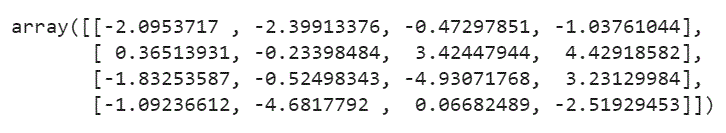


14) We are now going to scale q*k^T product by square toot of d_k. This is to minimize the variance between q and k and thus stabilize the values.

In [ ]:
scaled_q_k_transpose = np.matmul(q, k.T) / math.sqrt(d_q)
print("scaled q_k_transpose = \n", scaled_q_k_transpose)

scaled q_k_transpose = 
 [[-0.02716322 -0.72400957 -0.03122941 -0.37747203]
 [-0.25355123  0.27211012  0.51689225  0.8525754 ]
 [-0.67049824 -1.6775649   0.08597802 -0.27420452]
 [ 0.52333134 -0.45620207 -0.67027887 -0.28372168]]


**Masking**

15) Whilst carrying out Self Attention in Transformers during the Encoding phase, it is not necessarily required to carry out Masking because we are anyway processing every word embedding simultaneously.

16) During the Decoding phase, for a task like machine translation, we know during training the next word. But since we are generating one word at a time, it is absolutely necessary to carry out masking as otherwise we will tend to overfit, thus, learning the training data precisely but not the unseen data. Hence the image below of the Transformer architecture terms the Multi Head Attention during the Decoding phase as "Masked Multi Head Attention" but that's not so in the Encoding phase.

17) We do not want the words to generate context from words in the future.

To implement masking we do the following

a) First get a lower triangular matrix of ones with diagonal elements and elements below the diagonal as 1

b) This clearly illustrates words will derive context as the are generated

c) Not masking will also create confusion because the vocabulary of 2 languages will be completely different

In [ ]:
mask = np.tril(np.ones((L, L)))
print("mask = ", mask)

mask =  [[1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]]


In [ ]:
mask[mask==0] = -np.infty
mask[mask==1] = 0

In [ ]:
scaled_q_k_transpose = scaled_q_k_transpose + mask
print("scaled_q_k_transpose = \n", scaled_q_k_transpose)

scaled_q_k_transpose = 
 [[-0.02716322        -inf        -inf        -inf]
 [-0.25355123  0.27211012        -inf        -inf]
 [-0.67049824 -1.6775649   0.08597802        -inf]
 [ 0.52333134 -0.45620207 -0.67027887 -0.28372168]]


We carry out softmax to convert the numbers / attention scores into softmax
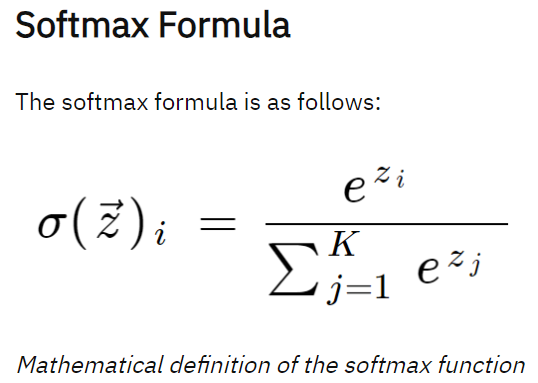

In [ ]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis = 1)).T

In [ ]:
scaled_q_k_transpose_softmax = softmax(scaled_q_k_transpose)
print("scaled_q_k_transpose_softmax = ", scaled_q_k_transpose_softmax)

scaled_q_k_transpose_softmax =  [[0.19507172 0.17520753 0.34618382 0.28353693]
 [0.11153153 0.0902411  0.32896371 0.46926366]
 [0.11218828 0.1781219  0.03751744 0.67217238]
 [0.29485656 0.08288382 0.44422222 0.1780374 ]]


We can term the above matrix as the ATTENTION Matrix

In [ ]:
attention = scaled_q_k_transpose_softmax
print("attention = \n", attention)

attention = 
 [[0.19507172 0.17520753 0.34618382 0.28353693]
 [0.11153153 0.0902411  0.32896371 0.46926366]
 [0.11218828 0.1781219  0.03751744 0.67217238]
 [0.29485656 0.08288382 0.44422222 0.1780374 ]]


We multiply the attention matrix and value matrix, we get a new set of vectors - these are the evctors transformed from the original input embeddings into high quality vectors which capture the contextual meaning of the sentence

In [ ]:
transformed_embeddings = np.matmul(attention, v)
print("transformed_embeddings =\n", transformed_embeddings)

transformed_embeddings =
 [[ 0.0088405   1.02169663  0.74979171  0.49875969  0.70364538  0.08967082
   0.77847493  0.99938324]
 [-0.00414642  1.01093069  0.41005055  0.31319167  0.74382535  0.04387274
   0.91568776  1.29160399]
 [ 0.1586783   0.69935239  0.08241804  0.19392119  0.84981447 -0.00569584
   1.11283618  1.70977681]
 [-0.15713904  1.0405639   0.88202419  0.53425659  0.64590875  0.12988246
   0.65064696  0.7868073 ]]


**Through the above mechanism, we have transformed the original word embeddings into a set of 'high' quality embeddings which had the 'contextual' information.**